2021-06-01 00:00:00 <class 'cftime._cftime.DatetimeGregorian'>


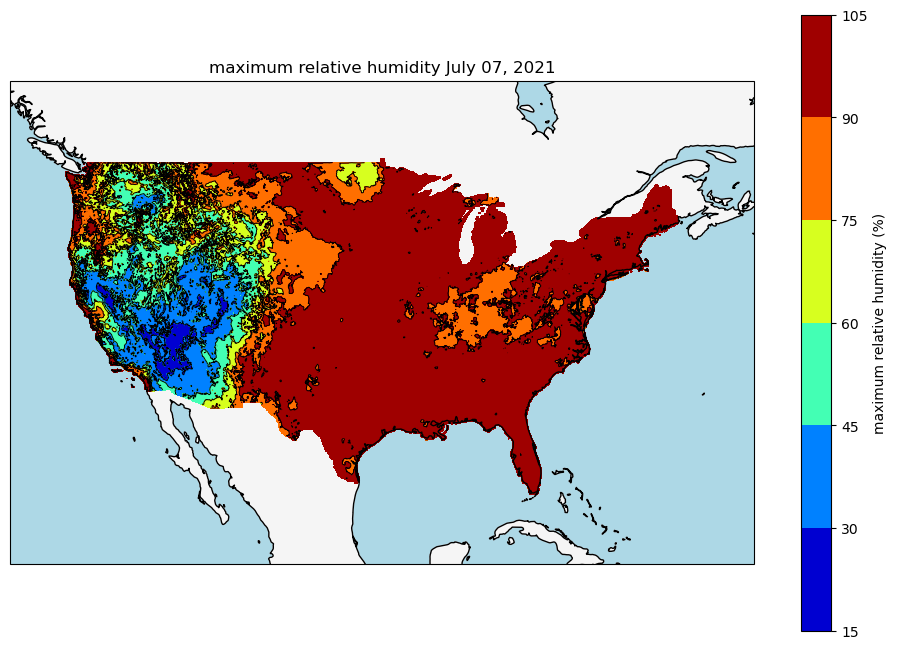

2021-06-01 00:00:00 <class 'cftime._cftime.DatetimeGregorian'>


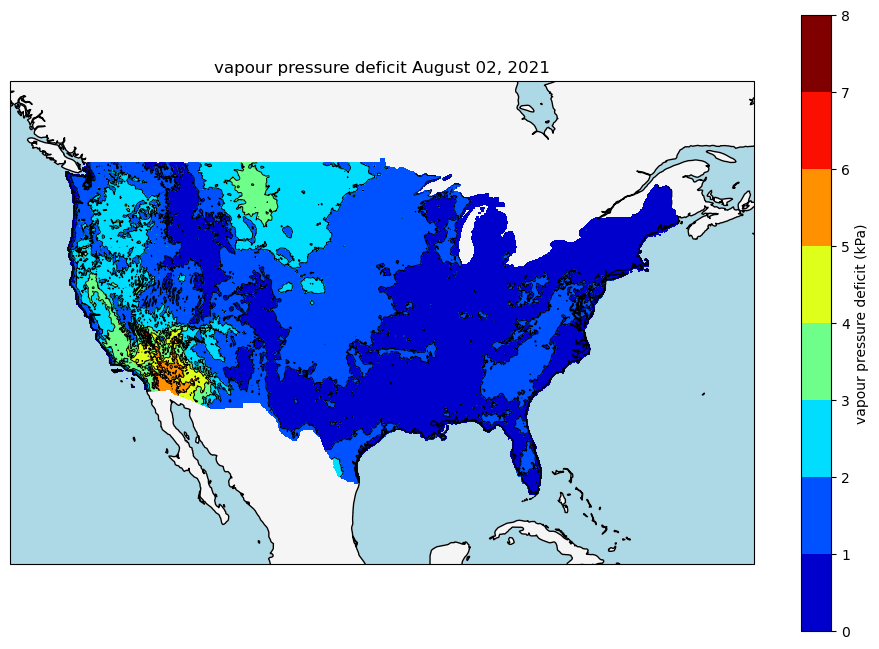

In [70]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import PowerNorm, LogNorm
from datetime import datetime
from netCDF4 import Dataset, num2date
from datetime import datetime
import imageio

variable_names = ['precipitation_amount', 'relative_humidity', 'mean_vapor_pressure_deficit', 'surface_downwelling_shortwave_flux_in_air']
file_names = ['pr', 'rmax', 'vpd', 'srad']
long_names = ['precipitation', 'maximum relative humidity', 'vapour pressure deficit', 'downward_shortwave_radiation']
index_needed = 1
variable_name = variable_names[index_needed]
long_name = long_names[index_needed]
file_name = file_names[index_needed]



def contour(target_date, variable_name, long_name, file_name,  other_variable_name=None, other_long_name=None, other_file_name=None):
    data = Dataset(f'../../data/{file_name}.nc', mode='r')
    lat1 = data.variables['lat'][:]
    lon1 = data.variables['lon'][:]
    time = data.variables['day'][:]  # Replace 'day' with the actual time variable in your file
    time_units = data.variables['day'].units  # Get time units
    dates = num2date(time, time_units)
    print(dates[0], type(dates[0]))
    cmap = 'jet_r'
    if file_name == 'pr':
        cmap='YlGnBu'
    elif file_name == 'rmax':
            cmap='YlGnBu'
    elif file_name == 'vpd':
            cmap='YlGnBu'
    else:
            cmap='YlOrRd'
    # if file_name != 'rmax':
    #     return
    date_index = next((i for i, date in enumerate(dates) if date == target_date), None)

    if date_index is not None:
        # Extract the data for the specified date
        var = data.variables[variable_name][date_index, :, :]  # Replace with your variable name

        vmin = np.min(var)
        vmax = np.max(var)

        # Create meshgrid for latitude and longitude
        lon, lat = np.meshgrid(lon1, lat1)

        # Set up the map with Cartopy (using PlateCarree projection here)
        fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

        # Set the extent (longitude and latitude bounds) to zoom in and make the map taller
        ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())  # Adjust latitude and longitude bounds

        ax.set_aspect(1.3)  # Adjust aspect ratio to make inner map taller

        # Add ocean and land features
        ax.add_feature(cfeature.OCEAN, zorder=0, color='lightblue')  # Ocean background
        ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', color='whitesmoke')  # Land background
        ax.coastlines(resolution='50m', color='black', linewidth=1)  # Coastlines

        # Plot the filled contour map with PowerNorm for scaling
        
        if variable_name == 'surface_downwelling_shortwave_flux_in_air':
            cmap = 'jet'
        cmap='jet'
        # cmap='YlGnBu'
        
        contour_filled = ax.contourf(lon, lat, var, cmap=cmap, 
                                    norm=PowerNorm(gamma=1.0, vmin=vmin, vmax=vmax), 
                                    transform=ccrs.PlateCarree())

        # Put contours on top of the filled contours to make it clearer
        contour_lines = ax.contour(lon, lat, var, colors='black', linewidths=0.7, transform=ccrs.PlateCarree())
        # contour_lines = ax.contour(lon, lat, var, cmap='jet', linewidths=1.5, transform=ccrs.PlateCarree())

        # Put colorbar and labels
        plt.colorbar(contour_filled, ax=ax, orientation='vertical', label=long_name + f" ({data.variables[variable_name].units})")
        # plt.colorbar(contour_lines, ax=ax, orientation='vertical', label=long_name + f" ({data.variables[variable_name].units})")
        plt.title(f'{long_name} {target_date.strftime("%B %d, %Y")}')
        
        # Save the file
        plt.show()
        # plt.savefig(f'../images/contour_frames_{file_name}/{target_date.strftime("%B %d, %Y")}.png')
        data.close()

contour(datetime(year=2021, month=7, day=7), variable_name=variable_name, file_name=file_name, long_name=long_name)

index_needed = 2
variable_name = variable_names[index_needed]
long_name = long_names[index_needed]
file_name = file_names[index_needed]

contour(datetime(year=2021, month=8, day=2), variable_name=variable_name, file_name=file_name, long_name=long_name)

